In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [27]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [28]:
data.shape

(381109, 12)

In [29]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [30]:
target = data.Response
df = pd.concat([data.drop(['Response'], axis=1), test])
df.shape

(508146, 11)

In [31]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000
mean,254073.500000,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123
std,146689.259281,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,127037.250000,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000
50%,254073.500000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000
75%,381109.750000,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000


In [32]:
data.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [33]:
df['Vehicle_Age_Encoded']  = df['Vehicle_Age'] \
                                            .replace({'1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 3})

df['Gender_Encoded']  = df['Gender'] \
                                            .replace({'Male': 1, 'Female': 2})

df['Vehicle_Damage_Enoded']  = df['Vehicle_Damage'] \
                                            .replace({'Yes': 1, 'No': 0})





In [34]:
df.drop(['Gender', 'Vehicle_Age', 'Vehicle_Damage'],axis=1, inplace=True)

In [35]:
df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_Encoded,Gender_Encoded,Vehicle_Damage_Enoded
0,1,44,1,28.0,0,40454.0,26.0,217,3,1,1
1,2,76,1,3.0,0,33536.0,26.0,183,1,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,3,1,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,2,0


<AxesSubplot:>

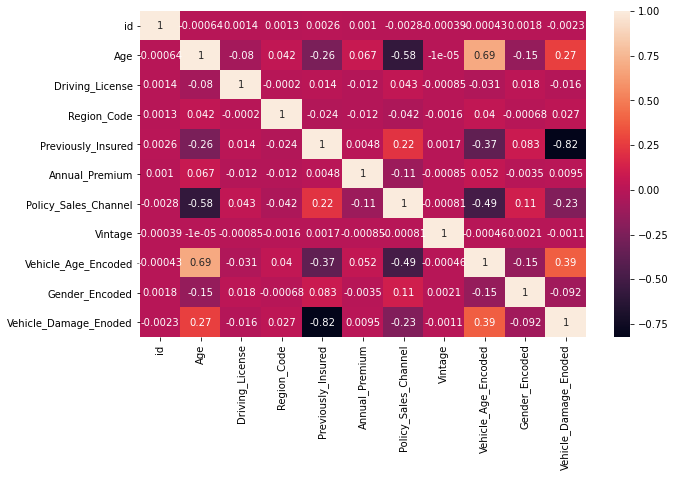

In [39]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)